In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import os
from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image
from IPython.display import display
import matplotlib


# UM Data-Set

In [48]:
#create dataype dictionary for data, then import our cleaned data.
datatypes = {'Primary': 'category', 'UMSCUMCC': 'category', '': 'float', 'Sex': 'category',
       'Marital_status': 'category', 'Meno_stat': 'category', 'famhist': 'category', 'Nationality': 'category', 'Race': 'category',
       'diagnosis': 'category', 'Classification': 'category', 'Laterality': 'category', 'STAGEAJCC6': 'category',
       'Differentiation': 'category', 'ER_status': 'category', 'PR_status': 'category', 'CERB2_status': 'category', 'Pri_Rx': 'category',
       'Surgery_type': 'category', 'Axill_dissect': 'category', 'Radiotherapy': 'category', 'Chemotherapy': 'category',
       'Event': 'category'}




data = pd.read_csv('../clean_cancer_data.csv', sep='\t',dtype=datatypes).copy()
data.rename(index=str, columns={'Unnamed: 0':'Patient_num'},inplace=True)
data.head()

,Patient_num,Primary,UMSCUMCC,Age_at_dx,Sex,Marital_status,Meno_stat,famhist,Nationality,Race,...,Differentiation,ER_status,PR_status,CERB2_status,Pri_Rx,Surgery_type,Axill_dissect,Radiotherapy,Chemotherapy,Event
0,1,1,2,33,1,1.0,1.0,0.0,1,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0
1,6,1,1,60,1,1.0,2.0,1.0,1,2.0,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0
2,7,1,1,67,1,1.0,2.0,0.0,1,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0
3,8,1,1,65,1,1.0,2.0,1.0,1,2.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0
4,9,1,1,57,1,1.0,2.0,0.0,1,2.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0


In [49]:

proc_data = data[['Primary','UMSCUMCC','Age_at_dx','Sex','Marital_status','Meno_stat','famhist','Nationality','Race','diagnosis','Classification','Laterality','STAGEAJCC6','Differentiation','ER_status','PR_status','CERB2_status','Pri_Rx','Surgery_type','Axill_dissect','Radiotherapy','Chemotherapy']].copy()
cancer_target = data[['Event']].copy()
print(data.Event.value_counts())

1    2323
0     671
Name: Event, dtype: int64


In [50]:
X_train, X_test, y_train, y_test = train_test_split(proc_data, np.ravel(cancer_target),stratify=np.ravel(cancer_target), test_size=0.20, random_state=101)

## SVM

In [51]:
#parameters taken from models notebook
svm = svm.SVC(C= 1000, gamma= 0.001, kernel= 'rbf')
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.62      0.13      0.22       134
           1       0.80      0.98      0.88       465

   micro avg       0.79      0.79      0.79       599
   macro avg       0.71      0.56      0.55       599
weighted avg       0.76      0.79      0.73       599

accuracy score:  0.7879799666110183


## Random Forest Experiment

In [52]:
overall_importance = np.zeros(len(proc_data.columns))
overall_accuracy = 0
overall_f1 = np.array([0,0],dtype=np.float)
overall_prec = np.array([0,0],dtype=np.float)
overall_rec =np.array([0,0],dtype=np.float)
acc_scores = []
model_list = []
r = 1000
for i in range(r):
    rfc = RandomForestClassifier(n_estimators=5,max_depth=5)
    rfc.fit(X_train, y_train)
    overall_importance += rfc.feature_importances_
    predictions = rfc.predict(X_test)
    overall_accuracy += accuracy_score(y_test,predictions)
    overall_f1  += np.array([f1_score(y_test,predictions,pos_label='0'),f1_score(y_test,predictions,pos_label='1')])
    overall_prec  += np.array([precision_score(y_test,predictions,pos_label='0'),precision_score(y_test,predictions,pos_label='1')])
    overall_rec += np.array([recall_score(y_test,predictions,pos_label='0'),recall_score(y_test,predictions,pos_label='1')])
    
    
    
    acc_scores.append(accuracy_score(y_test,predictions))
    model_list.append(rfc)

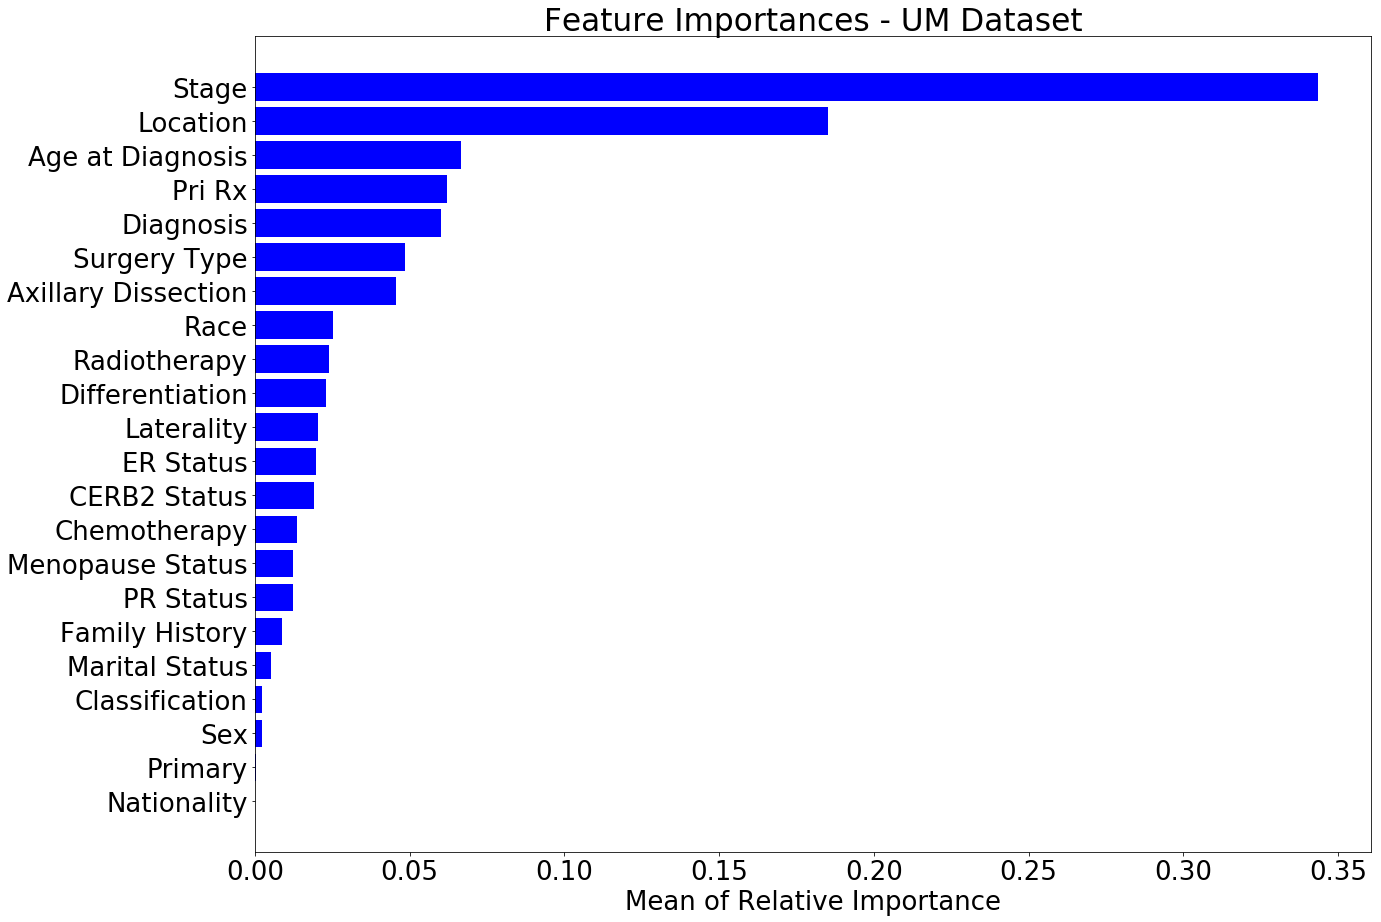

acc:  0.7905759599332209  prec:  [0.6596976  0.79739003]  rec:  [0.13548507 0.97935484]  f1:  [0.21925074 0.87895806]


In [53]:
average_importance = overall_importance/r
average_accuracy = overall_accuracy/r
average_rec = overall_rec/r
average_prec = overall_prec/r
average_f1 = overall_f1/r
proc_data.rename(columns={'STAGEAJCC6':'Stage','UMSCUMCC': 'Location', 'Age_at_dx': 'Age at Diagnosis','Marital_status': 'Marital Status',
                   'Meno_stat':'Menopause Status','famhist':'Family History','diagnosis':'Diagnosis',
                   'ER_status': 'ER Status','PR_status': 'PR Status','CERB2_status': 'CERB2 Status','Pri_Rx': 'Pri Rx',
                  'Surgery_type': 'Surgery Type','Axill_dissect': 'Axillary Dissection'}, inplace=True)
features = proc_data.columns
indices = np.argsort(average_importance)


font = {'family' : 'normal',
        'size'   : 26}

matplotlib.rc('font', **font)



fig= plt.figure(figsize=(20,15))
plt.title('Feature Importances - UM Dataset')
plt.barh(range(len(indices)), average_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Mean of Relative Importance')





plt.show()
print('acc: ',average_accuracy,' prec: ',average_prec,' rec: ',average_rec,' f1: ',average_f1)

In [54]:
#check accuracy of results and get the model with the best accuracy
acc_groups = pd.cut(acc_scores,[-1,0.5,0.6,0.7,0.75,0.8,0.85,0.9,1])
print(acc_groups.value_counts())
top = max(acc_scores)
top_position = acc_scores.index(top)
top_model = model_list[top_position]
print("Top Accuracy: ", top)

(-1.0, 0.5]      0
(0.5, 0.6]       0
(0.6, 0.7]       0
(0.7, 0.75]      0
(0.75, 0.8]    904
(0.8, 0.85]     96
(0.85, 0.9]      0
(0.9, 1.0]       0
dtype: int64
Top Accuracy:  0.8180300500834724


In [55]:
#now print estimators in the "top_model" (the most accurate)
for i,estimator in enumerate(top_model.estimators_):
    name = 'tree' + str(i)
    tree.export_graphviz(estimator,feature_names=proc_data.columns,
                    filled=True,
                    rounded=True,out_file=name + '.dot')
    os.system('dot -Tpng ' + name + '.dot' +  ' -o ' + name + '.png')
    

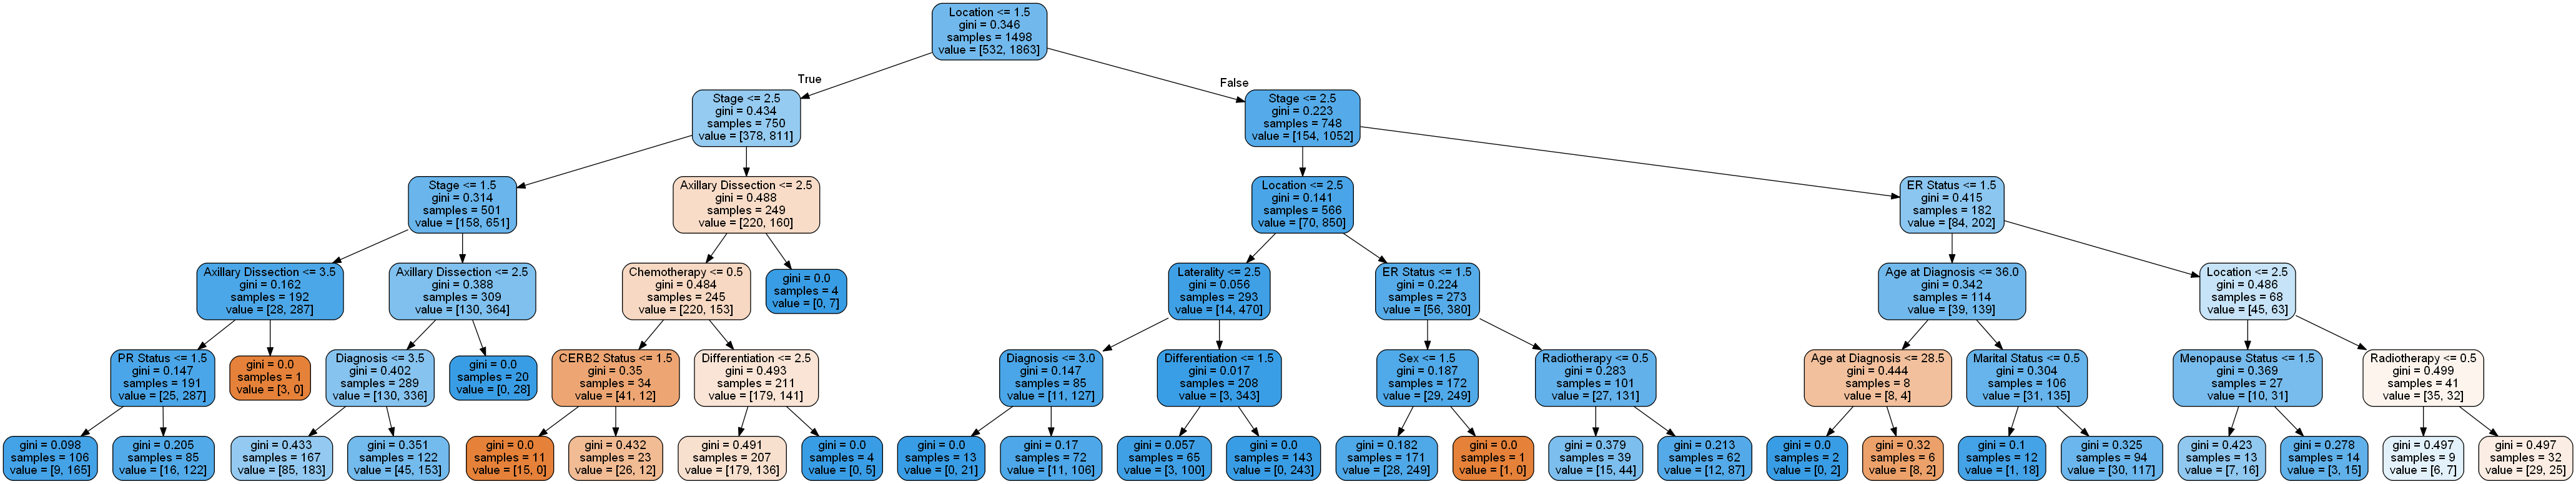

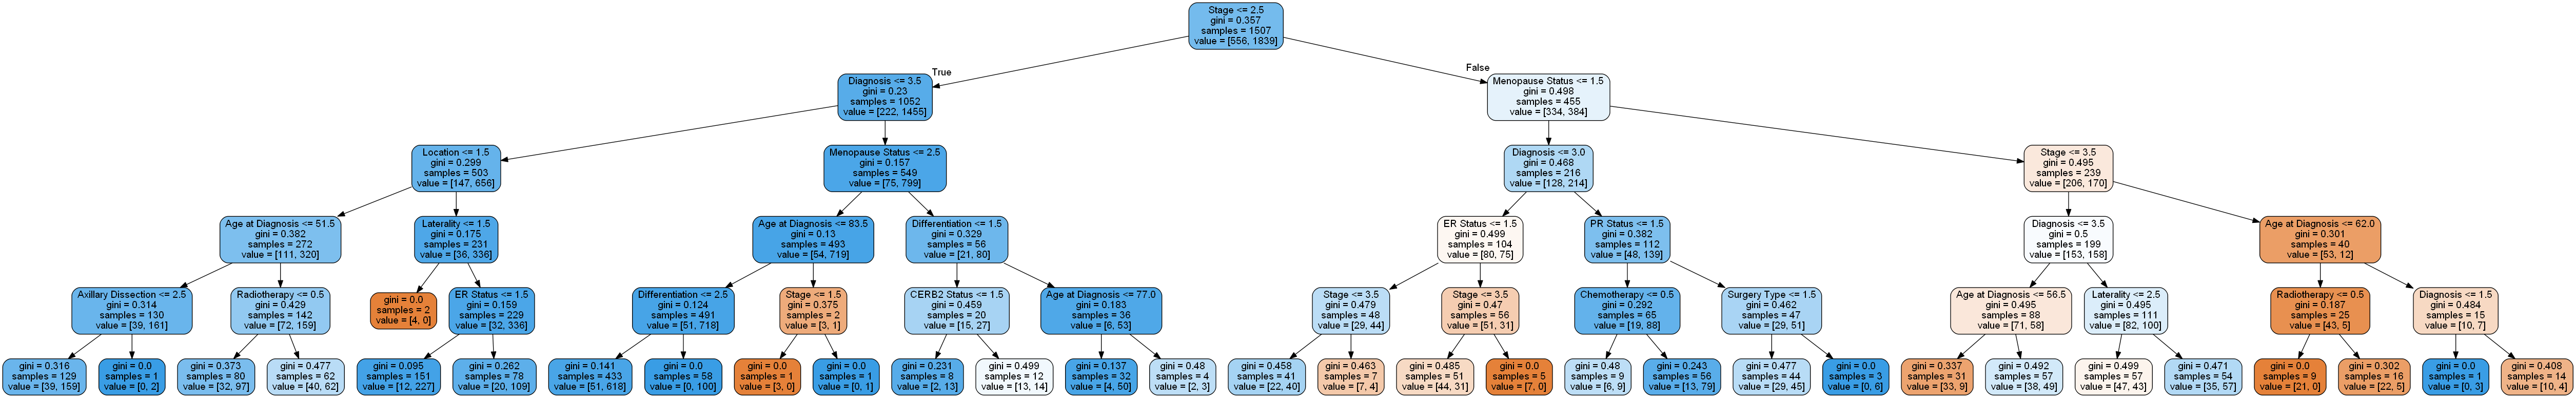

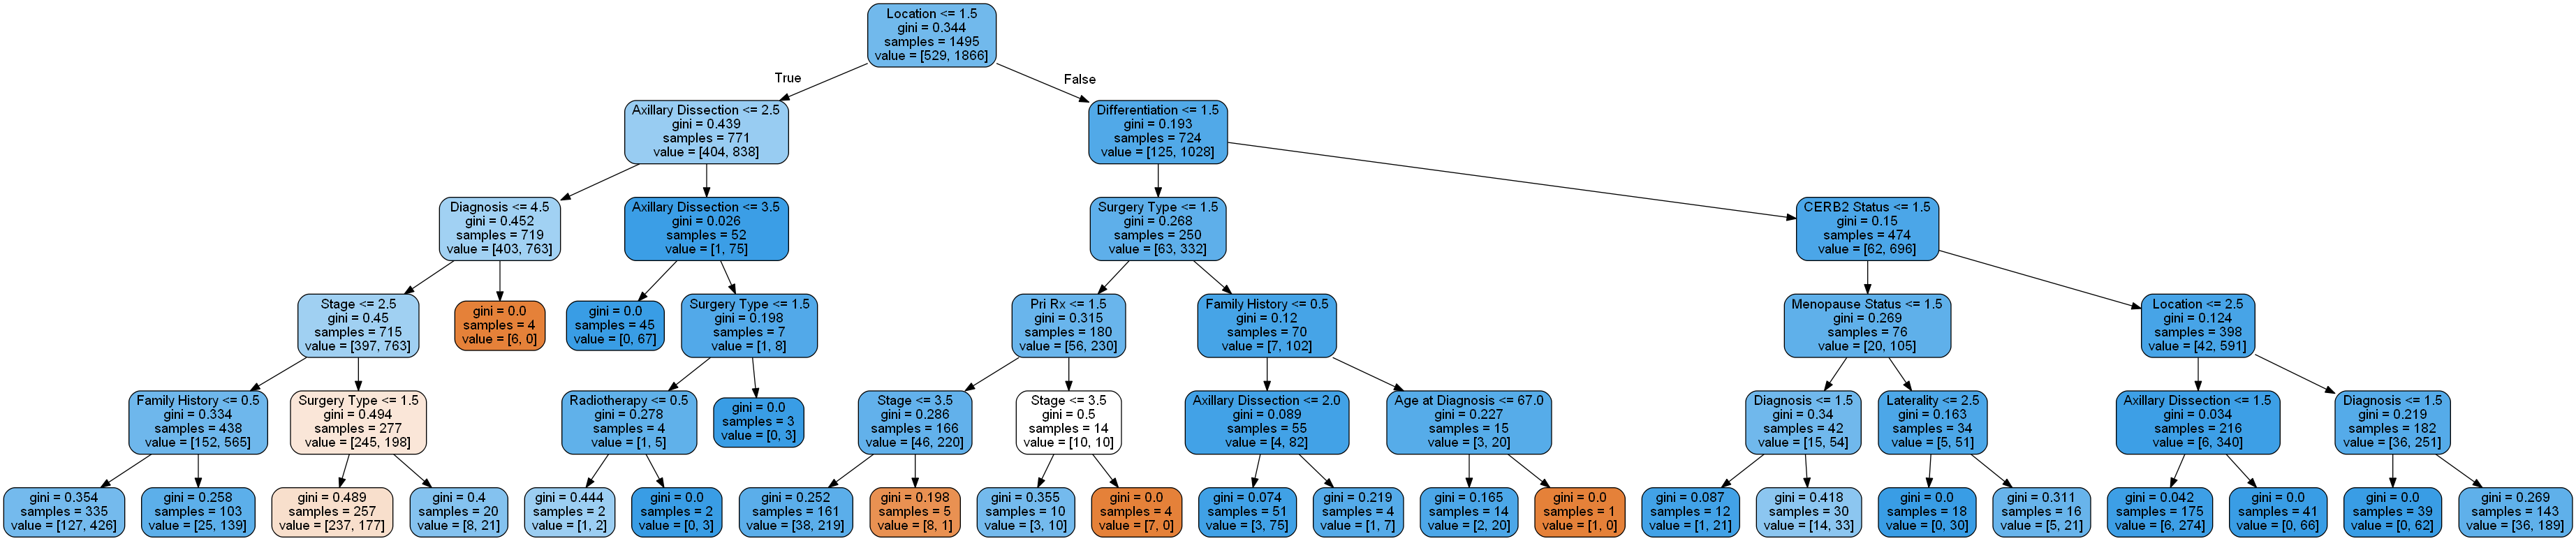

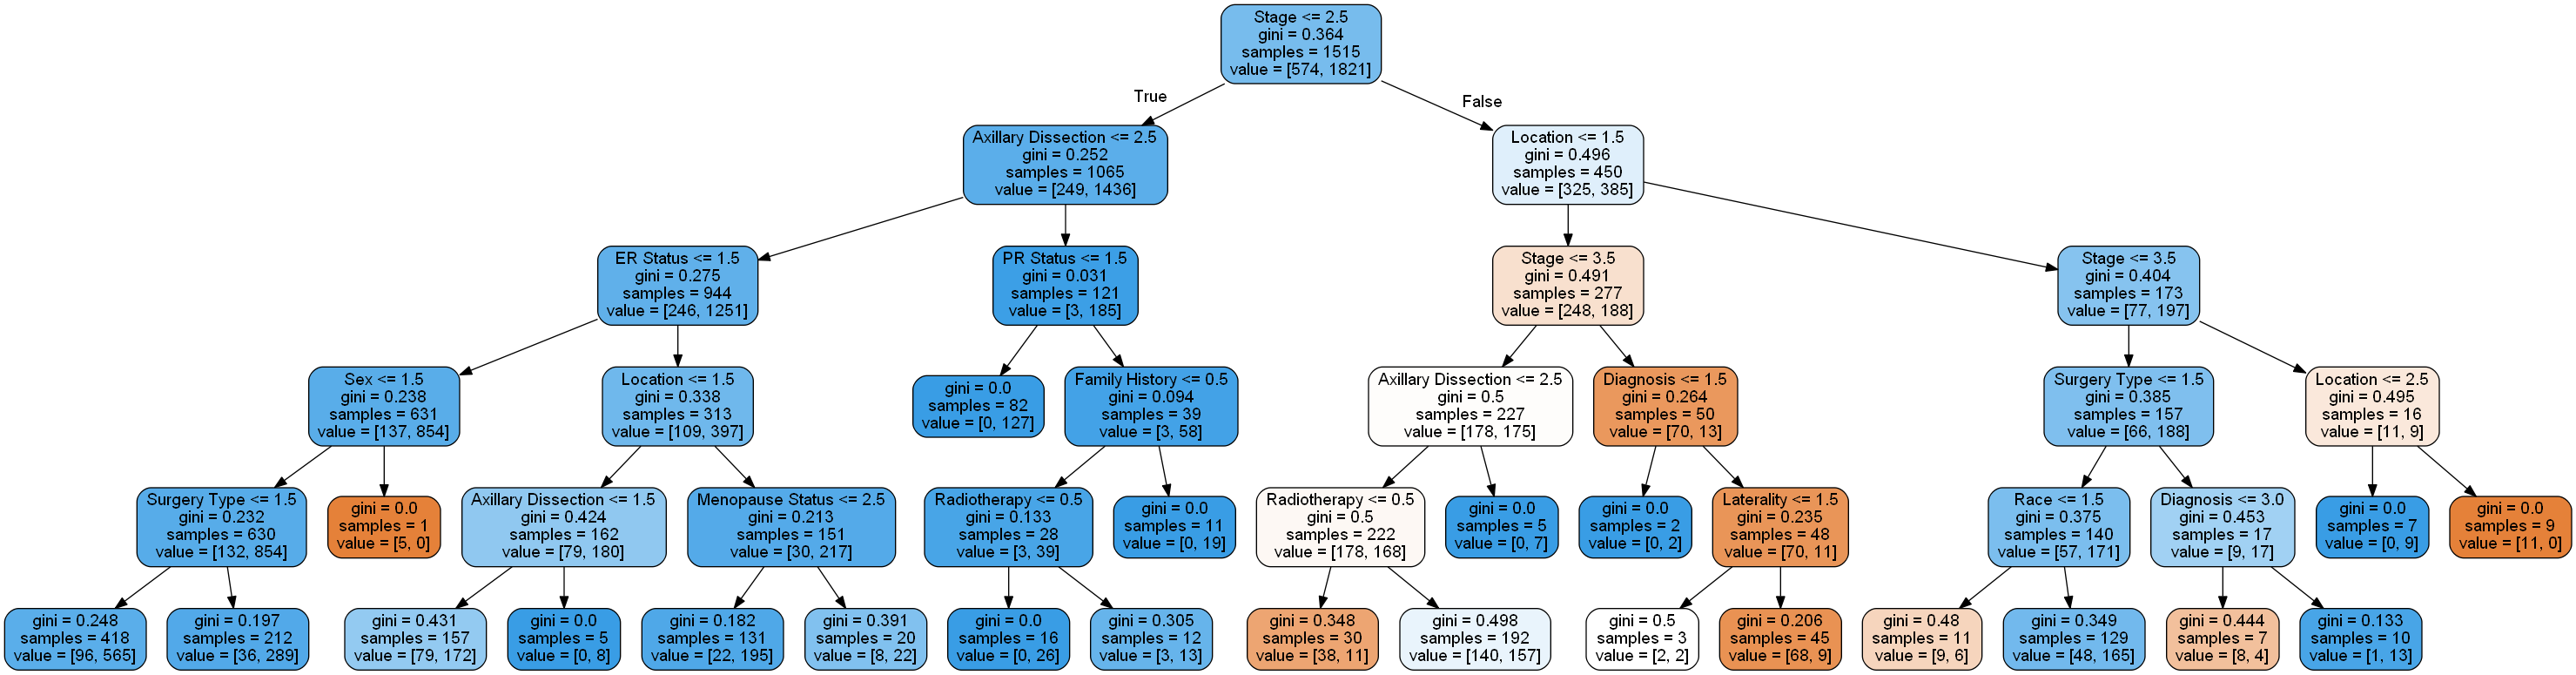

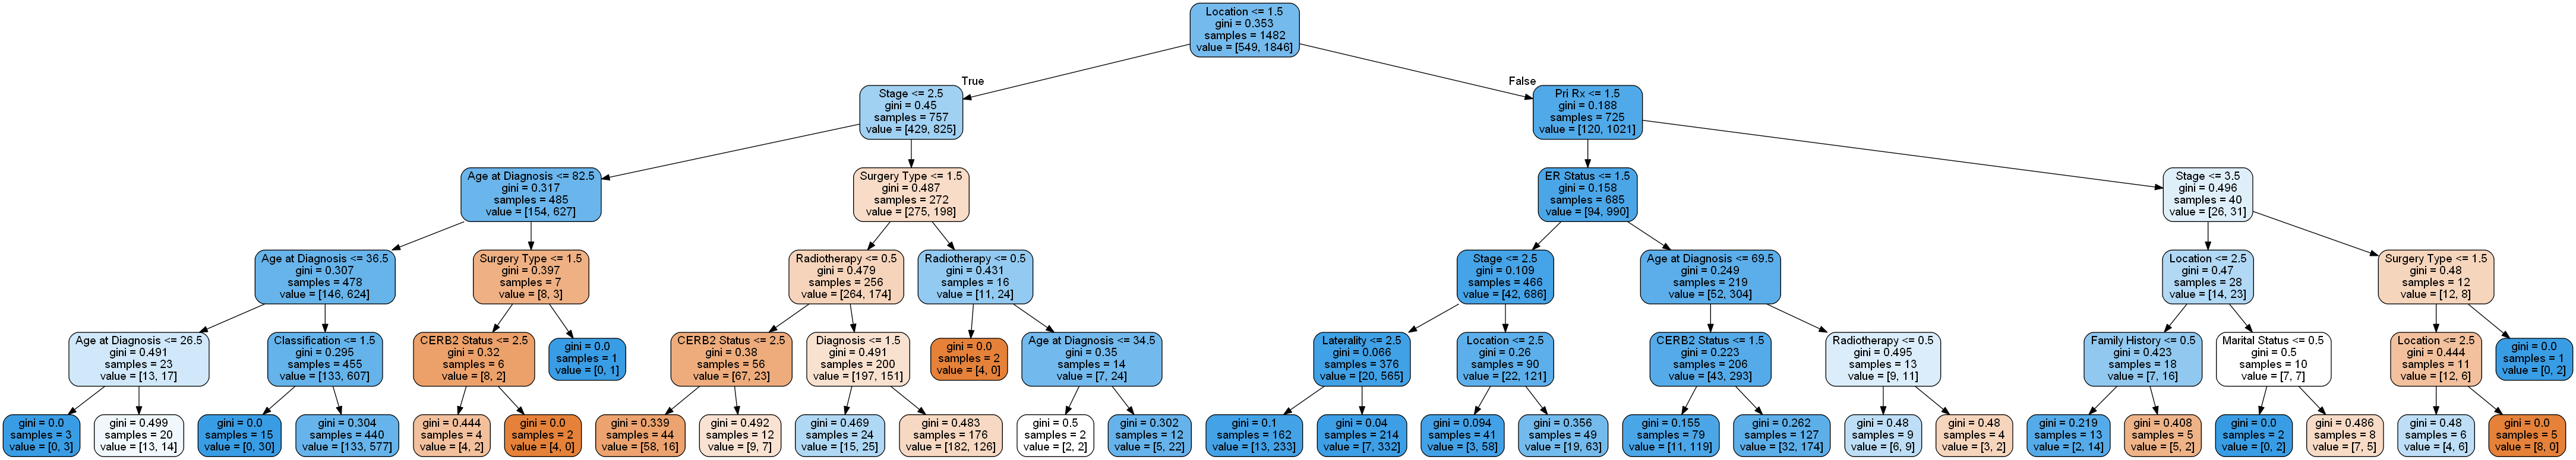

In [18]:
# print enumeratorsstimators
images = [Image(filename = f"tree{i}.png") for i in range(5)]    
display(images[0],images[1],images[2],images[3],images[4])








    

# SEER Database


In [56]:
seer = pd.read_csv('../seer_data.csv',sep='\t').copy()

sample_seer = seer.sample(n=50000)
sample_seer.Event.value_counts()


0    43595
1     6405
Name: Event, dtype: int64

In [57]:
sample_seer.columns

Index(['Unnamed: 0', 'Registry ID', 'Marital Status', 'Race', 'Sex',
       'Age at Diagnosis', 'Laterality', 'Diagnostic Confirmation',
       'AJCC Stage', 'ER Status', 'PR Status', 'Surgery', 'Behaviour', 'Grade',
       'Location', 'Sequence Number', 'Event'],
      dtype='object')

## SVM

In [58]:
seer_proc = sample_seer[['Registry ID','Marital Status','Race','Sex','Age at Diagnosis','Laterality',
        'Diagnostic Confirmation','AJCC Stage','ER Status','PR Status',
        'Surgery','Behaviour','Grade','Location','Sequence Number']].copy()
seer_target = sample_seer['Event'].copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(seer_proc, np.ravel(seer_target),stratify=np.ravel(seer_target), test_size=0.20, random_state=101)

In [26]:
#train using the best parameters computed in the model notebook
best_svm = svm.SVC(C= 100, gamma= 0.0001, kernel= 'rbf')
best_svm.fit(X_train,y_train)
predictions = best_svm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print("accuracy score: ",accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8718
           1       0.70      0.24      0.36      1282

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.80      0.61      0.65     10000
weighted avg       0.87      0.89      0.87     10000

accuracy score:  0.8893


## Random Forest Experiment

In [65]:
#should have made the below code a function since we are using it twice
overall_importance = np.zeros(len(seer_proc.columns))
overall_accuracy = 0
overall_f1 = np.array([0,0],dtype=np.float)
overall_prec = np.array([0,0],dtype=np.float)
overall_rec =np.array([0,0],dtype=np.float)
r = 1000
for i in range(r):
    rfc = RandomForestClassifier(n_estimators=5,max_depth=5)
    rfc.fit(X_train, y_train)
    overall_importance += rfc.feature_importances_
    predictions = rfc.predict(X_test)
    overall_accuracy += accuracy_score(y_test,predictions)
    overall_f1  += np.array([f1_score(y_test,predictions,pos_label=0),f1_score(y_test,predictions,pos_label=1)])
    overall_prec  += np.array([precision_score(y_test,predictions,pos_label=0),precision_score(y_test,predictions,pos_label=1)])
    overall_rec += np.array([recall_score(y_test,predictions,pos_label=0),recall_score(y_test,predictions,pos_label=1)])

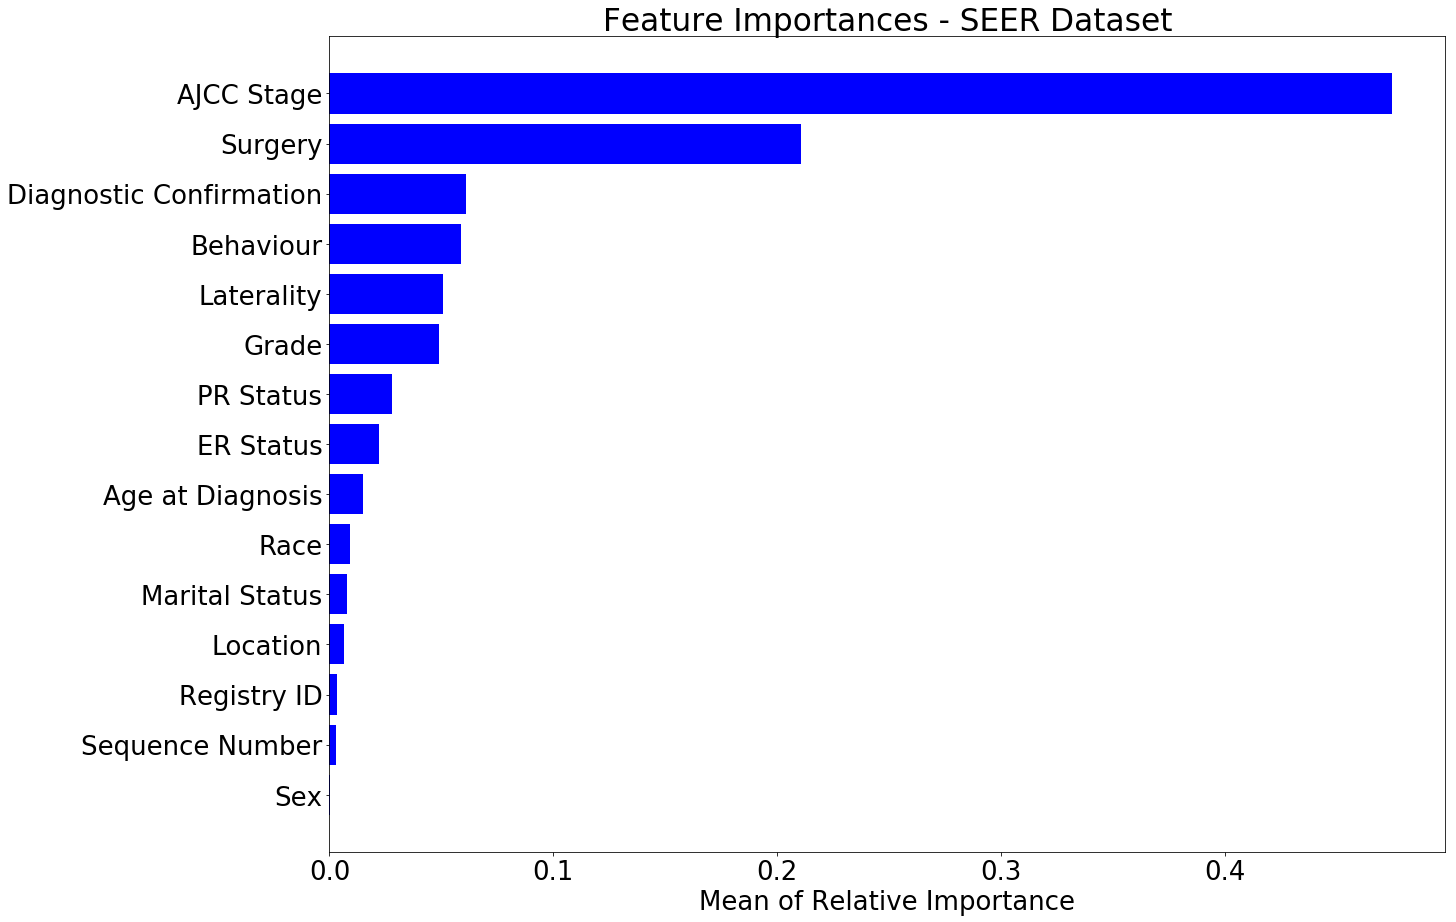

acc:  0.8833588000000001  prec:  [0.88946212 0.69389853]  rec:  [0.98921929 0.16282982]  f1:  [0.93667027 0.25974889]


In [66]:
average_importance = overall_importance/r
average_accuracy = overall_accuracy/r
average_rec = overall_rec/r
average_prec = overall_prec/r
average_f1 = overall_f1/r
features = seer_proc.columns
indices = np.argsort(average_importance)


font = {'family' : 'normal',
        'size'   : 26}

matplotlib.rc('font', **font)



fig= plt.figure(figsize=(20,15))
plt.title('Feature Importances - SEER Dataset')
plt.barh(range(len(indices)), average_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Mean of Relative Importance')





plt.show()
print('acc: ',average_accuracy,' prec: ',average_prec,' rec: ',average_rec,' f1: ',average_f1)

In [73]:
print(seer_target.value_counts())
print(cancer_target.Event.value_counts())

0    43595
1     6405
Name: Event, dtype: int64
1    2323
0     671
Name: Event, dtype: int64
